# Maps of mortality levels
## Flow: execute after 02_analysis_mortality_levels

In [1]:
import pandas as pd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import pathlib
from util import centimeter_to_inch, get_default_colors_maps

## Loading data

In [2]:
labels_sorted = ['Very low', 'Low', 'Intermediate', "High", "Very high", "Extremely high"]
labels_sorted

['Very low', 'Low', 'Intermediate', 'High', 'Very high', 'Extremely high']

In [3]:
df = pd.read_csv('data/df_mortality.csv')[['CODIGO_MUNICIPIO_6', 'CODIGO_MUNICIPIO_7', 'MUNICIPIO', 'SIGLA_ESTADO',        'NIVEL_LABEL_TAXA_OBITOS_ACUMULADO', 'NIVEL_LABEL_TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020', 'NIVEL_LABEL_TAXA_OBITOS_2020', 'NIVEL_LABEL_TAXA_OBITOS_2021', 'NIVEL_LABEL_TAXA_OBITOS_2022', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_04_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_06_TAXA_DOIS_MESES',  'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_08_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_10_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_12_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_02_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_04_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_06_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_08_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_10_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_12_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_02_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_04_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_06_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_08_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_10_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_12_TAXA_DOIS_MESES']].copy()
df.CODIGO_MUNICIPIO_6 = df.CODIGO_MUNICIPIO_6.astype('Int64')
df.CODIGO_MUNICIPIO_7 = df.CODIGO_MUNICIPIO_7.astype('Int64')

In [4]:
try:
    filename_map_municipalities = '../covid/data/map_municipalities_2019.geojson'
    path_map_municipalities = pathlib.Path(filename_map_municipalities)
    map_municipalities = gpd.read_file(path_map_municipalities)

    filename_map_states = '../covid/data/map_states_2019.geojson'
    path_map_states = pathlib.Path(filename_map_states)
    map_states = gpd.read_file(path_map_states)
except:
    map_municipalities = geobr.read_municipality(year=2019)
    map_states =  geobr.read_state(year=2019)
    map_municipalities.to_file('../covid/data/map_municipalities_2019.geojson', driver='GeoJSON')
    map_states.to_file('../covid/data/map_states_2019.geojson', driver='GeoJSON')

map_municipalities.code_muni = map_municipalities.code_muni.astype('Int64')
df_map_municipalities = map_municipalities.merge(df, how="right", left_on="code_muni", right_on="CODIGO_MUNICIPIO_7")

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [5]:
df_map_municipalities

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,CODIGO_MUNICIPIO_6,CODIGO_MUNICIPIO_7,...,NIVEL_LABEL_OBITOS_ACUMULADOS_2021_06_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2021_08_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2021_10_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2021_12_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2022_02_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2022_04_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2022_06_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2022_08_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2022_10_TAXA_DOIS_MESES,NIVEL_LABEL_OBITOS_ACUMULADOS_2022_12_TAXA_DOIS_MESES
0,1100015,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.22630 -11.89037, -62.20670...",110001,1100015,...,Intermediate,Low,Low,High,Intermediate,Intermediate,Low,Very low,Intermediate,Low
1,1100023,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.58751 -9.84984, -63.58542 ...",110002,1100023,...,High,Intermediate,Low,Very high,Low,Low,Very low,High,Very low,Low
2,1100031,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.71834 -13.39058, -60.70904...",110003,1100031,...,Intermediate,Low,Intermediate,Very low,Very low,Very low,Intermediate,Very low,Very low,Very low
3,1100049,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.50114 -11.30119, -61.50080...",110004,1100049,...,High,Low,Low,High,Low,Low,Low,Low,Very low,Low
4,1100056,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.51346 -13.28575, -61.52479...",110005,1100056,...,Intermediate,Low,Intermediate,Intermediate,High,Very low,Low,Low,Very low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-48.53842 -16.75003, -48.54051...",522200,5222005,...,Intermediate,Low,Intermediate,Very low,High,Very low,Low,Low,Very low,Low
5566,5222054,Vicentinópolis,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-49.90713 -17.61460, -49.90588...",522205,5222054,...,Low,Very low,Very low,Very low,Low,Very low,Very low,Very low,Very low,Very low
5567,5222203,Vila Boa,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-47.07742 -15.06330, -47.07851...",522220,5222203,...,Very low,Very low,Very low,Very low,Intermediate,Very low,Very low,High,Very low,Very low
5568,5222302,Vila Propício,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-48.91463 -15.20939, -48.91532...",522230,5222302,...,Low,High,Very low,Very low,Very low,Very low,Very low,High,Very low,Very low


## Map visualizations

In [6]:
custom_points = {}

point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
point = Point(point.x, point.y - 2.2)
custom_points['RJ'] = point

point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
point = Point(point.x + 0.6, point.y - 0.8)
custom_points['SC'] = point

point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
point = Point(point.x + 2.1, point.y - 1)
custom_points['ES'] = point

point = map_states[map_states.abbrev_state == 'SE'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1.5)
custom_points['SE'] = point

point = map_states[map_states.abbrev_state == 'AL'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1)
custom_points['AL'] = point

point = map_states[map_states.abbrev_state == 'PE'].geometry.centroid.values[0]
point = Point(point.x + 4.1, point.y - 0.7)
custom_points['PE'] = point

point = map_states[map_states.abbrev_state == 'PB'].geometry.centroid.values[0]
point = Point(point.x + 3.1, point.y - 0.5)
custom_points['PB'] = point

point = map_states[map_states.abbrev_state == 'RN'].geometry.centroid.values[0]
point = Point(point.x + 2.8, point.y)
custom_points['RN'] = point

point = map_states[map_states.abbrev_state == 'PI'].geometry.centroid.values[0]
point = Point(point.x + 1, point.y)
custom_points['PI'] = point

point = map_states[map_states.abbrev_state == 'DF'].geometry.centroid.values[0]
point = Point(point.x, point.y + 0.35)
custom_points['DF'] = point

point = map_states[map_states.abbrev_state == 'GO'].geometry.centroid.values[0]
point = Point(point.x, point.y - 1.4)
custom_points['GO'] = point

point = map_states[map_states.abbrev_state == 'AC'].geometry.centroid.values[0]
point = Point(point.x, point.y - 0.4)
custom_points['AC'] = point

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


In [12]:
def replace_legend_items(legend, sorted_labels):
    for txt in legend.texts:
        for i in range(len(sorted_labels)):
            if txt.get_text() == str(i):
                txt.set_text(sorted_labels[i])

def plot_map_mortality(df, width=34.8, height=52.2, nrows=3, ncols=2, filename_extra='',
                       columns = ['NIVEL_LABEL_TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020', 'NIVEL_LABEL_TAXA_OBITOS_2020', 'NIVEL_LABEL_TAXA_OBITOS_2021', 'NIVEL_LABEL_TAXA_OBITOS_2022', 'NIVEL_LABEL_TAXA_OBITOS_ACUMULADO'],
                       titles = ['a) 2020 (first half)', 'b) 2020', 'c) 2021', 'd) 2022', 'e) Accumulated period']):
    df = df.copy()

    linewidth_estados = 0.4
    # linewidth_municipios = linewidth_estados * 0.000001
    linewidth_municipios = 0

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(centimeter_to_inch(width), centimeter_to_inch(height)), nrows=nrows, ncols=ncols, subplot_kw=dict(aspect='equal'))
    ax = ax.ravel()
    # ax[4].remove()
    for j  in range(len(columns)):
        column = columns[j]
        ax_atual = ax[j]

        for i in range(len(labels_sorted)):
            label = labels_sorted[i]
            df.loc[df[column] == label, 'ordem_grupo'] = str(i)

        ax_atual.title.set_text(titles[j])

        if nrows == 1:
            bbox_to_anchor = (-.85, 1.2)
        else:
            bbox_to_anchor = (-0.1, 2.5)

        df.plot(
            column='ordem_grupo',
            legend=j==3,
            cmap=get_default_colors_maps(6),
            legend_kwds={'loc': 'center', 'ncol': 6, 'bbox_to_anchor': bbox_to_anchor},
            edgecolor="gray",
            # missing_kwds={"color": "whitesmoke", "label": "Invalid values"},
            linewidth=linewidth_municipios,
            categorical=True,
            ax=ax_atual
        )

        map_states.boundary.plot(edgecolor="black", linewidth=linewidth_estados, ax=ax_atual)

        map_states[map_states.abbrev_state.isin(['RJ', 'SC', 'ES', 'SE', 'AL', 'PE', 'PB', 'RN', 'DF', 'GO', 'PI', 'AC']) == False].apply(lambda x: ax_atual.annotate(text=x.abbrev_state, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

        for ponto in custom_points.keys():
            ax_atual.text(custom_points[ponto].x, custom_points[ponto].y, ponto, ha='center')

        ax_atual.axis("off")

        if j == 3:
            replace_legend_items(ax_atual.get_legend(), labels_sorted)
            
    if (len(columns)%2 != 0) & (nrows > 1):
        ax[len(columns)].remove()

    fig.savefig('images/map_moratality_years'+filename_extra+'.png', bbox_inches="tight")    
    fig.savefig('images/map_moratality_years'+filename_extra+'.pdf', bbox_inches="tight")
    plt.show()

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is de

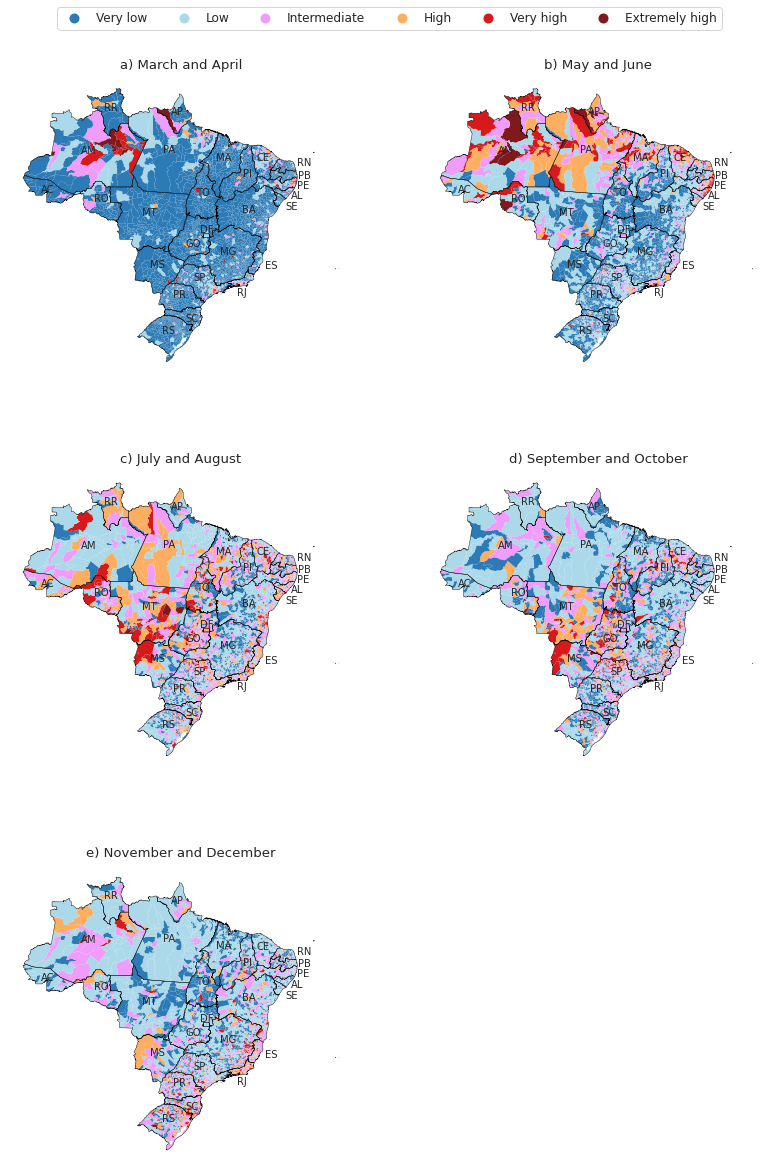

In [8]:
columns = ['NIVEL_LABEL_OBITOS_ACUMULADOS_2020_04_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_06_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_08_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_10_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2020_12_TAXA_DOIS_MESES']
titles = ['a) March and April', 'b) May and June', 'c) July and August', 'd) September and October', 'e) November and December']
plot_map_mortality(df_map_municipalities, filename_extra='2020', columns=columns, titles=titles, height=52.2, nrows=3)

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is de

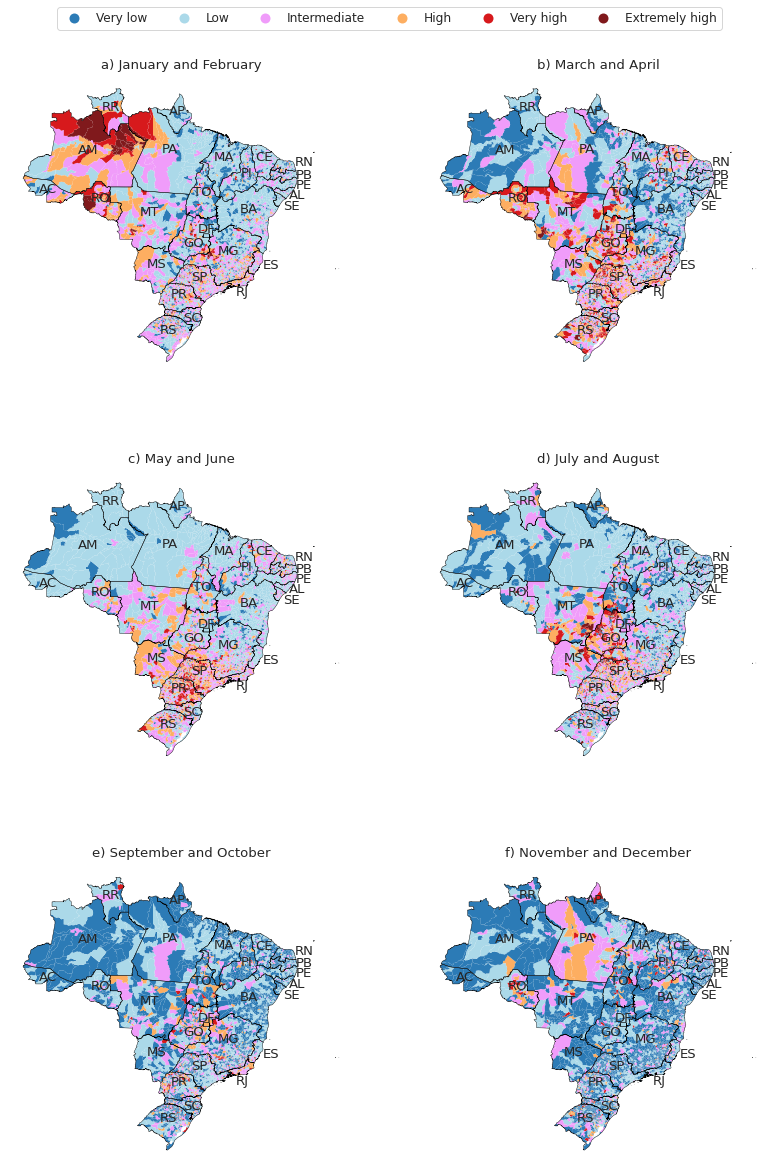

In [9]:
columns = ['NIVEL_LABEL_OBITOS_ACUMULADOS_2021_02_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_04_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_06_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_08_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_10_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2021_12_TAXA_DOIS_MESES']
titles = ['a) January and February', 'b) March and April', 'c) May and June', 'd) July and August', 'e) September and October', 'f) November and December']
plot_map_mortality(df_map_municipalities, filename_extra='2021', columns=columns, titles=titles, height=52.2, nrows=3)

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is de

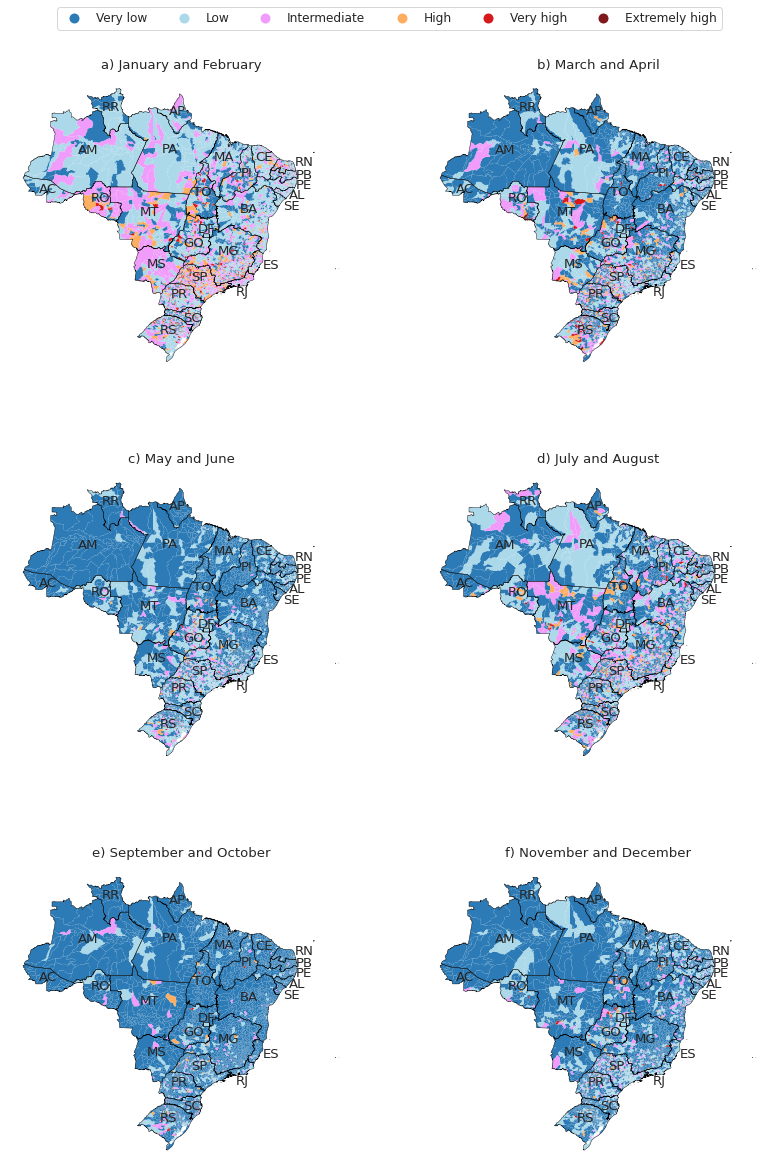

In [10]:
columns = ['NIVEL_LABEL_OBITOS_ACUMULADOS_2022_02_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_04_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_06_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_08_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_10_TAXA_DOIS_MESES', 'NIVEL_LABEL_OBITOS_ACUMULADOS_2022_12_TAXA_DOIS_MESES']
titles = ['a) January and February', 'b) March and April', 'c) May and June', 'd) July and August', 'e) September and October', 'f) November and December']
plot_map_mortality(df_map_municipalities, filename_extra='2022', columns=columns, titles=titles, height=52.2, nrows=3)

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is de

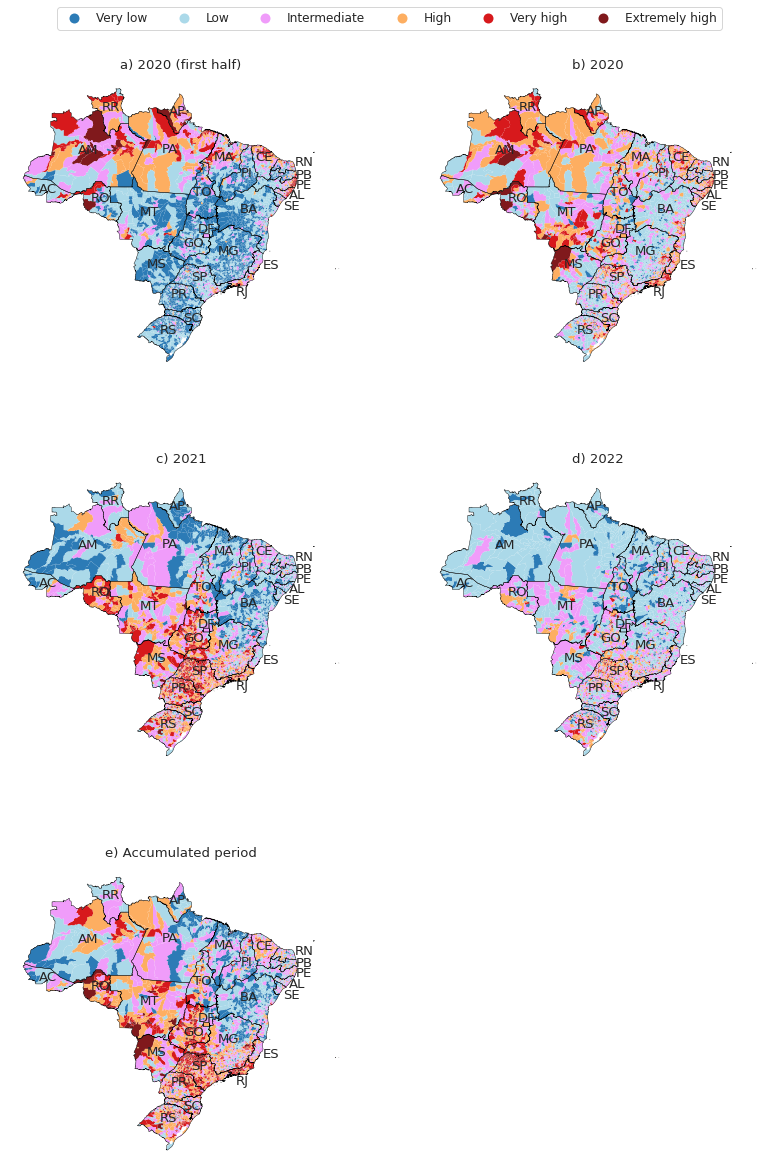

In [13]:
plot_map_mortality(df_map_municipalities)

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is de

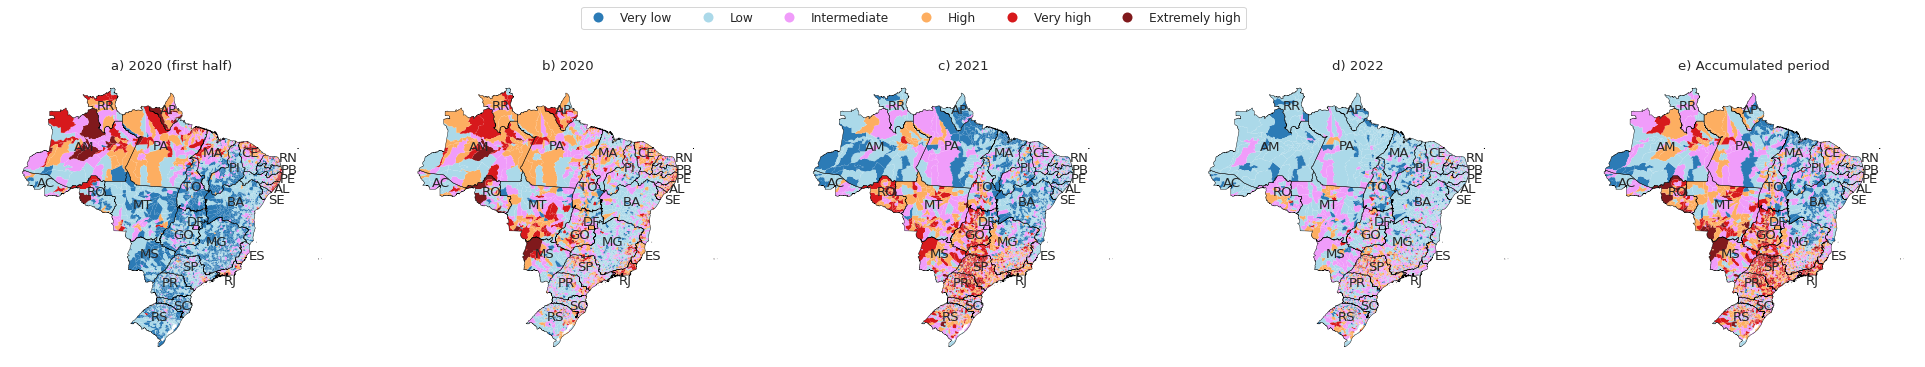

In [14]:
plot_map_mortality(df_map_municipalities, width=87, height=17.4, nrows=1, ncols=5, filename_extra='slide')

In [11]:
df_map_municipalities.groupby(['name_region', 'NIVEL_LABEL_TAXA_OBITOS_ACUMULADO']).count()['MUNICIPIO']

name_region   NIVEL_LABEL_TAXA_OBITOS_ACUMULADO
Centro Oeste  Extremely high                        47
              High                                 131
              Intermediate                         112
              Low                                   56
              Very high                            109
              Very low                              12
Nordeste      Extremely high                         1
              High                                 193
              Intermediate                         511
              Low                                  651
              Very high                             32
              Very low                             406
Norte         Extremely high                         8
              High                                  86
              Intermediate                         132
              Low                                  133
              Very high                             26
              Ver